# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [4]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [10]:
display(male_df.describe())
display(female_df.describe())

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

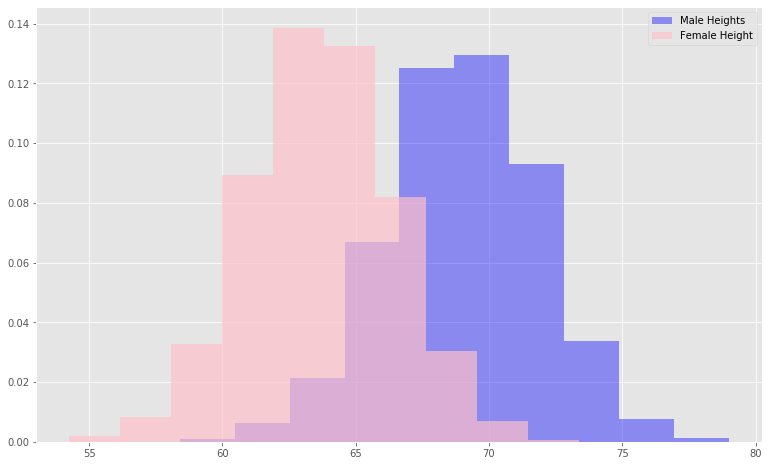

In [18]:
fig = plt.figure(figsize=(13,8))
plt.hist(male_df.Height, bins=10, density=True, color='blue', alpha=0.4, label='Male Heights')
plt.hist(female_df.Height, bins=10, density=True, color='pink', alpha=0.7, label='Female Height')
plt.legend()

In [19]:
# Male and female heights are normally distributed with males being on average taller (centered at ~ 68 in.)
# than females (centered ~ 63 in.).


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

(array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
        4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]),
 <a list of 10 Patch objects>)

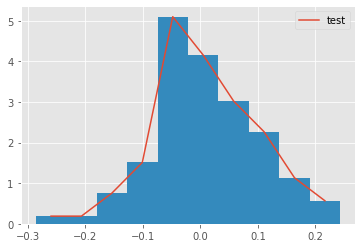

In [48]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    x = np.zeros(len(n))
    y = np.zeros(len(n))
    for k in range(len(n)):
        x[k] = 0.5*(bins[k]+bins[k+1])
        y[k] = n[k]
    return x, y


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

plt.hist(s, density=True)

## Add overlapping density plots to the histograms plotted earlier

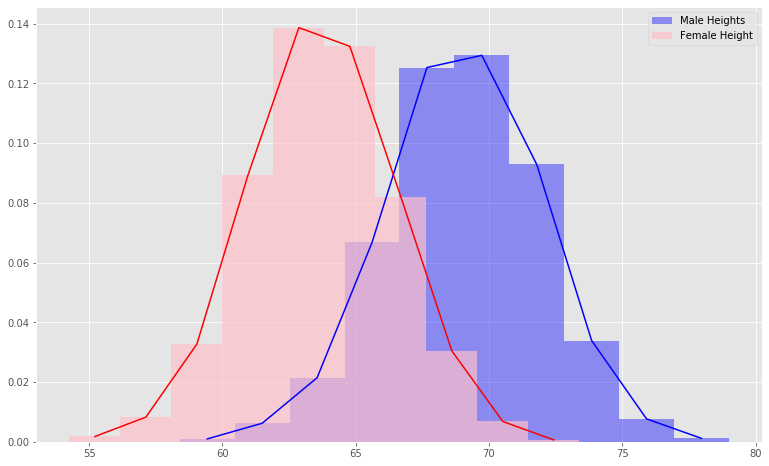

In [62]:
fig = plt.figure(figsize=(13,8))
plt.hist(male_df.Height, bins=10, density=True, color='blue', alpha=0.4, label='Male Heights')
plt.hist(female_df.Height, bins=10, density=True, color='pink', alpha=0.7, label='Female Height')
x1, y1 = density(male_df.Height)
x2, y2 = density(female_df.Height)
plt.plot(x1, y1, color='blue')
plt.plot(x2, y2, color='red')
plt.legend()

## Repeat the above exercise for male and female weights

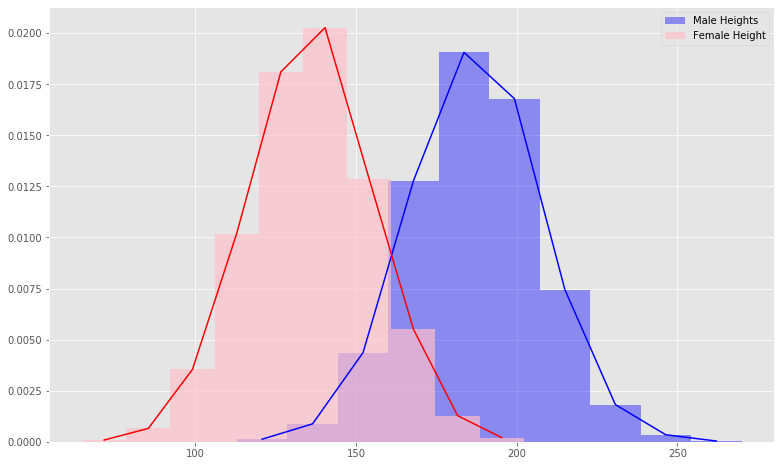

In [61]:
fig = plt.figure(figsize=(13,8))
plt.hist(male_df.Weight, bins=10, density=True, color='blue', alpha=0.4, label='Male Heights')
plt.hist(female_df.Weight, bins=10, density=True, color='pink', alpha=0.7, label='Female Height')
x1, y1 = density(male_df.Weight)
x2, y2 = density(female_df.Weight)
plt.plot(x1, y1, color='blue')
plt.plot(x2, y2, color='red')
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# What is the takeaway when comparing male and female heights and weights?

# Inline with experience. Males, on average, weigh more than females.

## Repeat the above experiments in seaborn and compare with your results

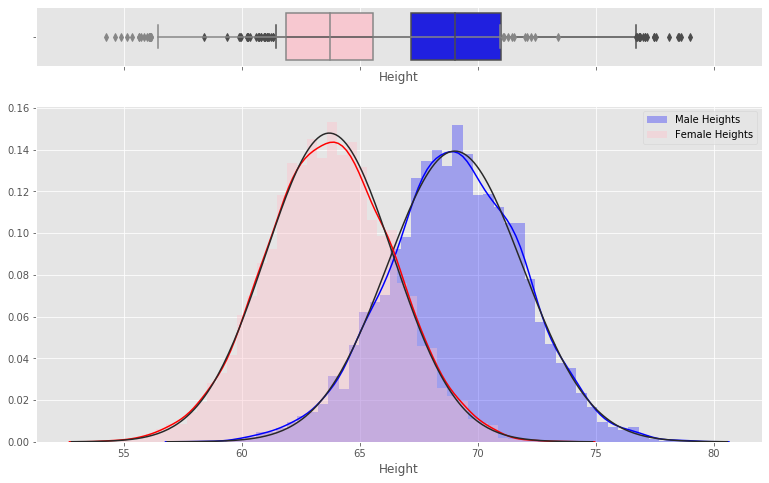

In [90]:
import seaborn as sns
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)}, figsize=(13,8))
sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                 'label':'Male Heights', 
                 'color':'blue', 
                 'alpha':0.3}, 
             kde=True, kde_kws={
                 'color':'blue'}, 
             fit=stats.norm, ax=ax2)
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                 'label':'Female Heights',
                 'color':'pink'},
             kde=True, kde_kws={
                 'color':'red'},
             fit=stats.norm, ax=ax2)
sns.boxplot(x=male_df.Height, ax=ax1, color='blue')
sns.boxplot(x=female_df.Height, ax=ax1, color='pink')
plt.legend()

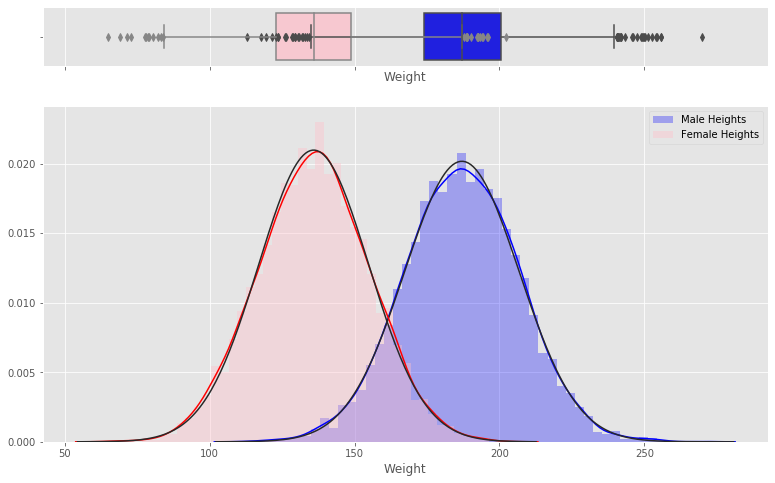

In [91]:
import seaborn as sns
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)}, figsize=(13,8))
sns.distplot(male_df.Weight, 
             hist=True, hist_kws={
                 'label':'Male Heights', 
                 'color':'blue', 
                 'alpha':0.3}, 
             kde=True, kde_kws={
                 'color':'blue'}, 
             fit=stats.norm, ax=ax2)
sns.distplot(female_df.Weight, 
             hist=True, hist_kws={
                 'label':'Female Heights',
                 'color':'pink'},
             kde=True, kde_kws={
                 'color':'red'},
             fit=stats.norm, ax=ax2)
sns.boxplot(x=male_df.Weight, ax=ax1, color='blue')
sns.boxplot(x=female_df.Weight, ax=ax1, color='pink')
plt.legend()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# Going the seaborn approach felt like the methods were more self contained--
# no need for helper functions like density() as with the first approach. Seaborn also felt 
# like the easier approach for stacking multiple plots in the same figure. Overall, seaborn
# felt like it produced more visualization for less code.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.